# Parkinson's Electrophysiological Signal Dataset (PESD) Analysis

This notebook provides an introduction to the Parkinson's Electrophysiological Signal Dataset (PESD), available on the DANDI Archive.
The dataset contains electrophysiological signals from both healthy and parkinsonian subjects.

**Dandiset ID:** [DANDI:001333](https://dandiarchive.org/dandiset/001333)

**Description:**

The dataset contains electrophysiological signals from both healthy and parkinsonian subjects. We generated two types of samples from each group. The parkinsonian signals show a relatively high power density at the beta frequency (13 to 30 Hz). Thus, the beta oscillations (13 to 30 Hz) in the subthalamic nucleus (STN) are typically used as the pathological biomarkers for PD symptoms. Each sample includes two types of signals: Beta Average Rectified Voltage (ARV) and Local Field Potential (LFP) from the Subthalamic Nucleus (STN). The ARV signals are in the frequency domain and LFP signals are in the time domain.

Beta ARV Signal: The controller beta values are determined by calculating the Average Rectified Value (ARV) of the beta band. This is achieved by fully rectifying the filtered LFP signal using a fourth-order Chebyshev band-pass filter with an 8 Hz bandwidth, centered around the peak of the LFP power spectrum. Local Field Potential (LFP) - STN: Local Field Potentials are derived from the synchronized activity of neuron populations between the cortex, STN, and thalamus.

More details can be found in our article named, “Preliminary Results of Neuromorphic Controller Design and a Parkinson's Disease Dataset Building for Closed-Loop Deep Brain Stimulation”, available at https://arxiv.org/abs/2407.17756

**License:** [CC-BY-4.0](https://creativecommons.org/licenses/by/4.0/)

**Citation:** Biswas, Ananna (2025) Parkinson's Electrophysiological Signal Dataset (PESD) (Version draft) [Data set]. DANDI Archive. https://dandiarchive.org/dandiset/001333/draft

**Important Note:** This notebook was AI-generated with human supervision and has not been fully verified. Use caution when interpreting the code or results.

Before getting started, make sure you have the following packages installed:
```bash
pip install pynwb lindi matplotlib numpy scipy seaborn
```

In [1]:
# listing all the assets in the Dandiset
from dandi.dandiapi import DandiAPIClient
client = DandiAPIClient()
dandiset = client.get_dandiset("001333")
assets = list(dandiset.get_assets())
assets

[RemoteBlobAsset(client=<dandi.dandiapi.DandiAPIClient object at 0x77337bf238c0>, identifier='5409700b-e080-44e6-a6db-1d3e8890cd6c', path='sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb', size=822640, created=datetime.datetime(2025, 3, 4, 3, 0, 51, 74095, tzinfo=TzInfo(UTC)), modified=datetime.datetime(2025, 3, 4, 3, 4, 54, 481314, tzinfo=TzInfo(UTC)), blob='5f931c2a-181e-4ac2-98b9-1e025cfedfb3', dandiset_id='001333', version_id='0.250304.0304')]

## Exploring the Dataset Structure

Let's explore the structure of the dataset and access some sample data from the NWB files.
We will focus on the file: `sub-healthy-simulated-data/sub-healthy-simulated-data_ses-001_ecephys.nwb`.

First, we will load the NWB file using the `lindi` and `pynwb` libraries.

In [2]:
import pynwb
import lindi
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# Load the NWB file
lindi_url = "https://lindi.neurosift.org/dandi/dandisets/001333/assets/5409700b-e080-44e6-a6db-1d3e8890cd6c/nwb.lindi.json"
f = lindi.LindiH5pyFile.from_lindi_file(lindi_url)
nwb = pynwb.NWBHDF5IO(file=f, mode='r').read()

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


## Accessing and Visualizing Sample Data

Now, let's access and visualize some sample data from the NWB file.
We will start by plotting the LFP signal for all electrodes.

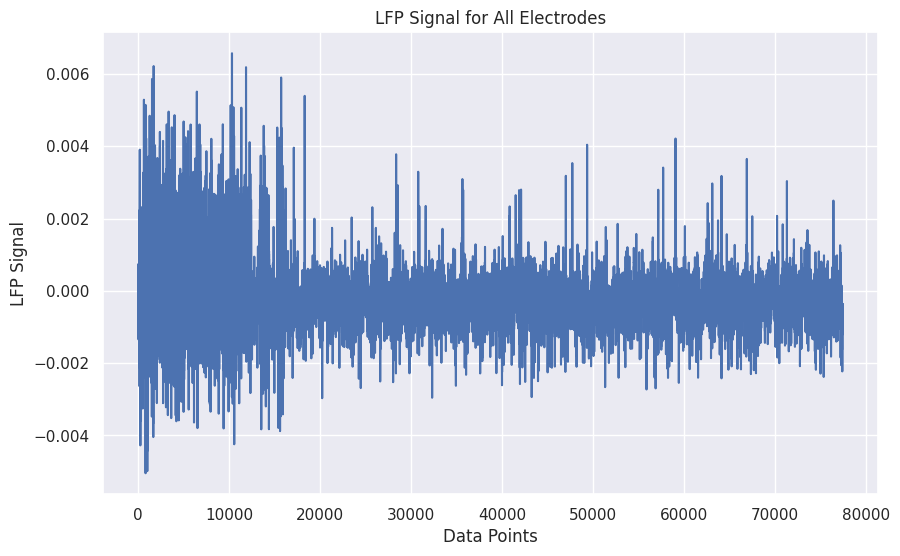

In [3]:
# Get the LFP data
ecephys = nwb.processing["ecephys"]
LFP = ecephys["LFP"]["LFP"]
lfp_data = LFP.data[:]
lfp_rate = LFP.rate
electrodes = nwb.ec_electrodes

# Get electrode information
electrode_ids = electrodes["id"].data[:]
electrode_locations = electrodes["location"].data[:]

# Select all electrodes to plot
num_electrodes = len(electrode_ids)

plt.figure(figsize=(10, 6))
plt.plot(lfp_data)  # Plot LFP
plt.xlabel("Data Points")
plt.ylabel("LFP Signal")
plt.title("LFP Signal for All Electrodes")
plt.savefig("lfp_allelectrodes.png")
plt.show()

## Common Analyses

This section provides examples of common analyses that might be relevant to the dataset's content.

1.  **Power Spectral Density (PSD) Analysis:**
Conduct PSD analysis to identify the dominant frequency components in the LFP signal.
2.  **Time-Frequency Analysis:**
Perform time-frequency analysis to examine how the frequency content of the LFP signal changes over time.
3.  **Correlation Analysis:**
Investigate the correlation between LFP signals from different brain regions.

The above analyses are only a few suggestions, and you are encouraged to explore the dataset further and perform your own analyses.